In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import load_model

In [2]:
# Load the IMDB dataset word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

In [ ]:
# Load the model
# model = load_model('simple_rnn_imdb.h5')
model = load_model('simple_rnn_imdb2.h5')  # with tanh, dropout and batchnormalization

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1313537 (5.01 MB)
Trainable params: 1313281 (5.01 MB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [32]:
model.get_weights()

[array([[ 0.03677723, -0.03206736, -0.03576135, ...,  0.01703003,
         -0.02537491,  0.00070233],
        [-0.15592495, -0.00060011,  0.01429482, ...,  0.00602882,
         -0.177738  ,  0.10588665],
        [-0.0865607 ,  0.04677073,  0.00951804, ...,  0.00320137,
          0.01411688, -0.00090475],
        ...,
        [ 0.05382046, -0.00046971, -0.03288743, ...,  0.01971725,
          0.05308484,  0.01932548],
        [ 0.07356609, -0.07157794, -0.04781602, ..., -0.02392902,
         -0.02565885, -0.01306423],
        [ 0.20540464,  0.05098971,  0.07737978, ...,  0.08916228,
         -0.07244941,  0.04767344]], dtype=float32),
 array([[ 0.07524107, -0.02481617,  0.02075515, ...,  0.2563324 ,
         -0.12116915, -0.2440753 ],
        [ 0.06286845,  0.18494067,  0.01332666, ...,  0.12815747,
          0.06804597,  0.09243458],
        [ 0.01635064,  0.01691535, -0.19997601, ..., -0.02714858,
          0.09893455,  0.1077367 ],
        ...,
        [ 0.10192169,  0.08769118,  0.0

In [ ]:
# Function to decode reviews
#def decode_review(encoded_review):
    #return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Function to preprocess user input
#def preprocess_text(text):
    #words = text.lower().split()
    #encoded_review = [word_index.get(word, 2) + 3 for word in words]  # + 3 pour respecter les 3 premiers indices réservés pour les caractères spéciaux
    #padded_review = sequence.pad_sequences([encoded_review], maxlen=500)
    #return padded_review

In [48]:
import re

# Function to decode reviews
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3,'?') for i in encoded_review])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # retire ! ? . , etc.
    words = text.split()

    encoded_review = [word_index.get(word, 2) + 3 for word in words]
    
    padded_review = sequence.pad_sequences([encoded_review], maxlen=500)
    return padded_review


In [49]:
# Prediction  function

def predict_sentiment(review):
    preprocessed_input=preprocess_text(review)

    prediction=model.predict(preprocessed_input)

    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
    
    return sentiment, prediction[0][0]

In [50]:
# Example review for prediction

example_review = 'The film was amazing!'
#example_review = 'The film was good!'


sentiment, score = predict_sentiment(example_review)

print(f'Review : {example_review}')
print(f'Sentiment : {sentiment}')
print(f'Prediction : {score}')

1/1 [==============================] - 0s 31ms/step
Review : The film was amazing!
Sentiment : Positive
Prediction : 0.9627227187156677


## Prediction with X_test

In [51]:
# vocabulary size
max_features=10000 

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [58]:
padded_review = sequence.pad_sequences(X_test, maxlen=500)

In [60]:
padded_review[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [61]:
y_pred_proba = model.predict(padded_review)
y_pred = (y_pred_proba > 0.5).astype("int32")

782/782 [==============================] - 15s 19ms/step


In [63]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


model_test_precision = precision_score(y_test,y_pred)
model_test_recall = recall_score(y_test,y_pred)
model_test_f1_score = f1_score(y_test,y_pred, average='weighted')
model_test_roc_auc_score = roc_auc_score(y_test,y_pred)


print("precison :", model_test_precision)
print("recall :", model_test_recall)
print("f1 score :", model_test_f1_score)
print("roc auc score :", model_test_roc_auc_score)

precison : 0.7779192569844955
recall : 0.83088
f1 score : 0.7966043210334348
roc auc score : 0.79684


782/782 [==============================] - 14s 18ms/step


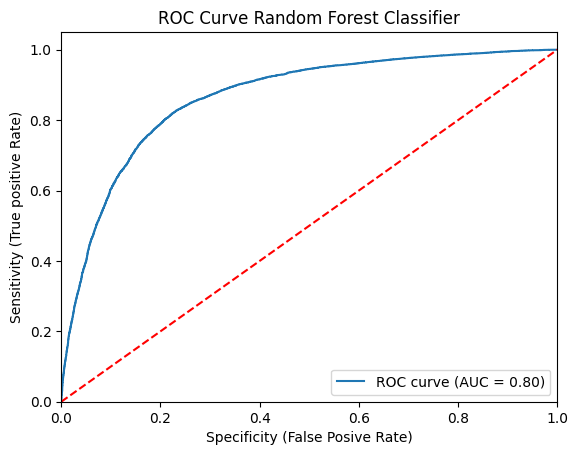

In [66]:
import matplotlib.pyplot as plt

plt.figure()

# Probabilités (sortie sigmoïde)
y_pred_proba = model.predict(padded_review).ravel()

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

    
plt.plot(fpr,tpr, label=f"ROC curve (AUC = {model_test_roc_auc_score:.2f})")

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Posive Rate)')
plt.ylabel('Sensitivity (True positive Rate)')
plt.legend(loc="lower right")
plt.title("ROC Curve Random Forest Classifier")
plt.show()